# Mínimos cuadrados
## Prueba 02
Interpole los siguientes conjuntos de datos con la función correspondiente. 

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al realizar el proceso de mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$

In [5]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al 
    reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al 
    parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

# Conjunto de datos de ejemplo

In [6]:
xs = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys = [
    -12.7292,
    -7.5775,
    -7.7390,
    -4.1646,
    -4.5382,
    2.2048,
    4.3369,
    2.2227,
    9.0625,
    7.1860,
]

In [7]:
from src import ajustar_min_cuadrados  # no modificar esta función

pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

[07-17 11:29:50][INFO] 2025-07-17 11:29:50.161501


[07-17 11:29:50][INFO] 2025-07-17 11:29:50.567449
[07-17 11:29:50][INFO] Se ajustarán 2 parámetros.
[07-17 11:29:50][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


[07-17 11:29:55][INFO] Se ajustarán 2 parámetros.
[07-17 11:29:55][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


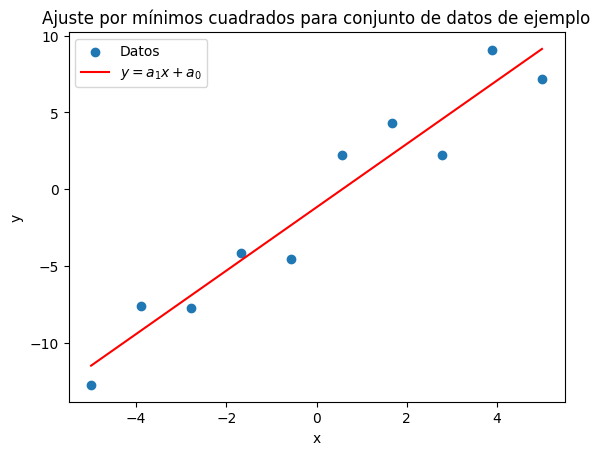

In [8]:
import numpy as np
import matplotlib.pyplot as plt

m, b = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

x = np.linspace(-5, 5, 100)

y = [m * xi + b for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados para conjunto de datos de ejemplo")
plt.legend()
plt.show()

## Conjunto de datos 1

In [9]:
xs1 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys1 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

Ecuación ajustada: y = 2.0244 x² + -1.1233 x + -0.63826
a2 (x²): 2.0244
a1 (x): -1.1233
a0 (constante): -0.63826


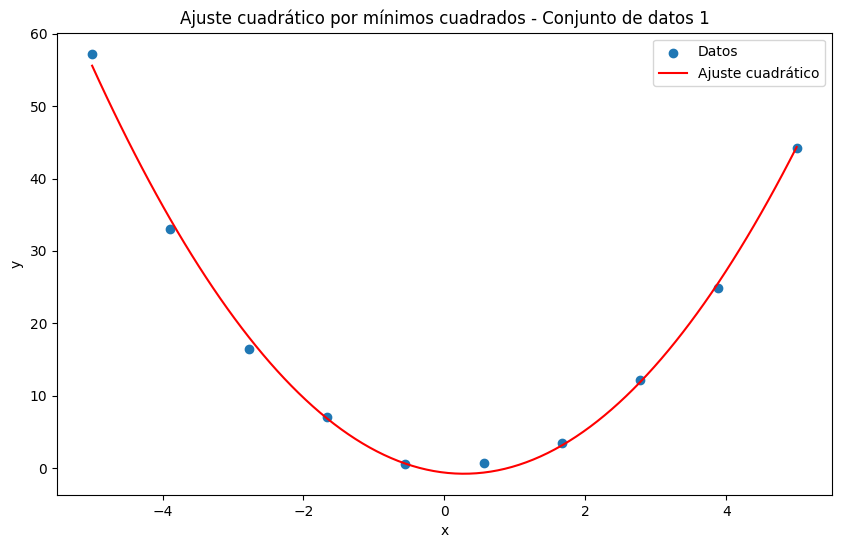

In [21]:
# Ajuste cuadrático: y = a2*x^2 + a1*x + a0
# Construimos el sistema para mínimos cuadrados
A = np.vstack([np.array(xs1)**2, np.array(xs1), np.ones(len(xs1))]).T
coefs = np.linalg.lstsq(A, ys1, rcond=None)[0]
a2, a1, a0 = coefs

# Imprimir la ecuación y los coeficientes redondeados 5 cifras decimales
print(f"Ecuación ajustada: y = {a2:.5g} x² + {a1:.5g} x + {a0:.5g}")
print(f"a2 (x²): {a2:.5g}") 
print(f"a1 (x): {a1:.5g}")
print(f"a0 (constante): {a0:.5g}")

# Graficar
y1_quad = a2 * x1**2 + a1 * x1 + a0
plt.figure(figsize=(10, 6))
plt.scatter(xs1, ys1, label="Datos")
plt.plot(x1, y1_quad, color='red', label='Ajuste cuadrático')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste cuadrático por mínimos cuadrados - Conjunto de datos 1")
plt.legend()
plt.show()

Interpole el conjunto de datos 1 usando la función cuadrática. 

## Conjunto de datos 2

In [11]:
xs2 = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]
ys2 = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]

Ecuación ajustada: y = 0.50025 * exp(1.5044 * x)
a: 0.50025
b: 1.5044


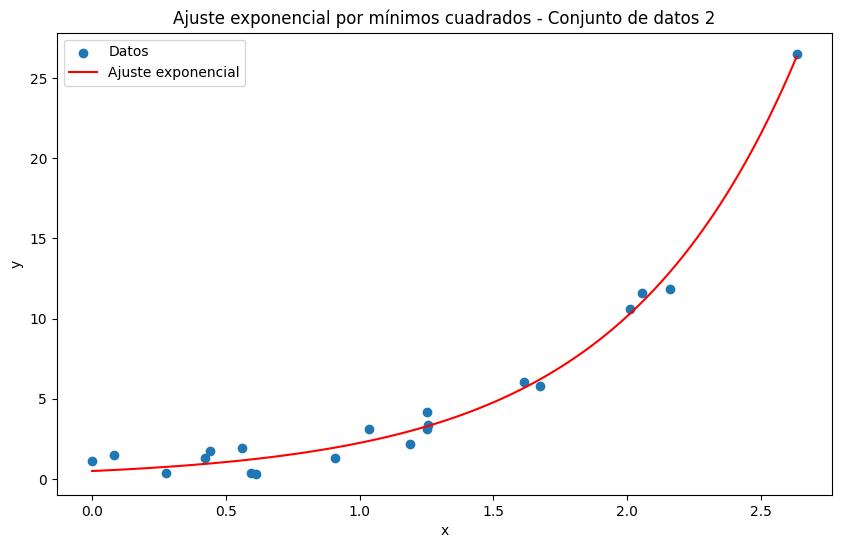

In [22]:
from scipy.optimize import curve_fit

# Ajuste exponencial: y = a * exp(b * x)

def exp_func(x, a, b):
    return a * np.exp(b * x)

# Ajustar los parámetros a y b
popt, _ = curve_fit(exp_func, xs2, ys2, p0=(1, 1))
a, b = popt

# Imprimir la ecuación y los coeficientes redondeados a 5 cifras
print(f"Ecuación ajustada: y = {a:.5g} * exp({b:.5g} * x)")
print(f"a: {a:.5g}")
print(f"b: {b:.5g}")

# Graficar
x2 = np.linspace(min(xs2), max(xs2), 100)
y2_exp = exp_func(x2, a, b)
plt.figure(figsize=(10, 6))
plt.scatter(xs2, ys2, label="Datos")
plt.plot(x2, y2_exp, color='red', label='Ajuste exponencial')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste exponencial por mínimos cuadrados - Conjunto de datos 2")
plt.legend()
plt.show()

Interpole el conjunto de datos 2 usando la función exponencial. 